In [23]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


start = "2010-01-01"
end = "2019-12-31"

# Fetch historical stock data using yfinance
df = yf.download('AAPL', start=start, end=end)

# Show the first few rows
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348845  6.477044  6.342225  6.451465  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [24]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823021,68.973132,68.496186,68.924708,48478800
2019-12-26,70.188492,70.205441,68.927130,68.956181,93121200
2019-12-27,70.161865,71.171444,69.755132,70.481445,146266000
2019-12-30,70.578285,70.861551,69.053030,70.079551,144114400


In [25]:
df = df.reset_index()
df.head()




Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455076,6.391278,6.422876,493729600
1,2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2,2010-01-06,6.348845,6.477044,6.342225,6.451465,552160000
3,2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [42]:
df = df.drop(columns=[('Date', '')], errors='ignore')
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455076,6.391278,6.422876,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348845,6.477044,6.342225,6.451465,552160000
3,6.337110,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800


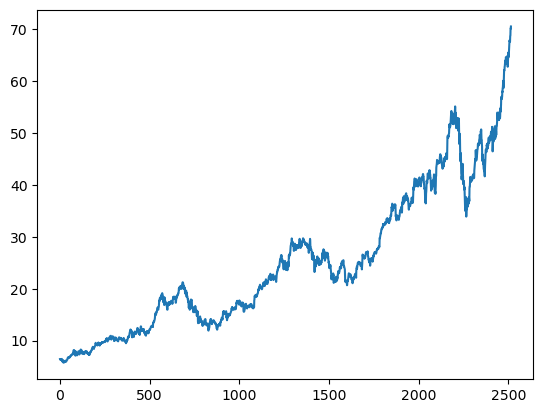

In [43]:
plt.plot(df.Close)

In [44]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455076,6.391278,6.422876,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348845,6.477044,6.342225,6.451465,552160000
3,6.337110,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800
...,...,...,...,...,...
2510,68.757660,68.818186,67.878820,67.917557,98572000
2511,68.823021,68.973132,68.496186,68.924708,48478800
2512,70.188492,70.205441,68.927130,68.956181,93121200


In [45]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212838
2511,57.410469
2512,57.647437
2513,57.875338


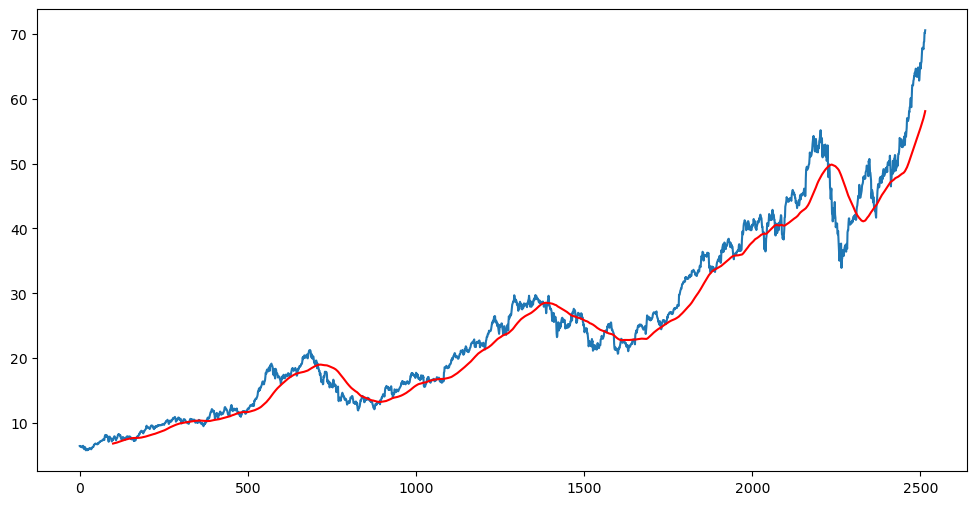

In [46]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [47]:
ma200 = df.Close.rolling(100).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212838
2511,57.410469
2512,57.647437
2513,57.875338


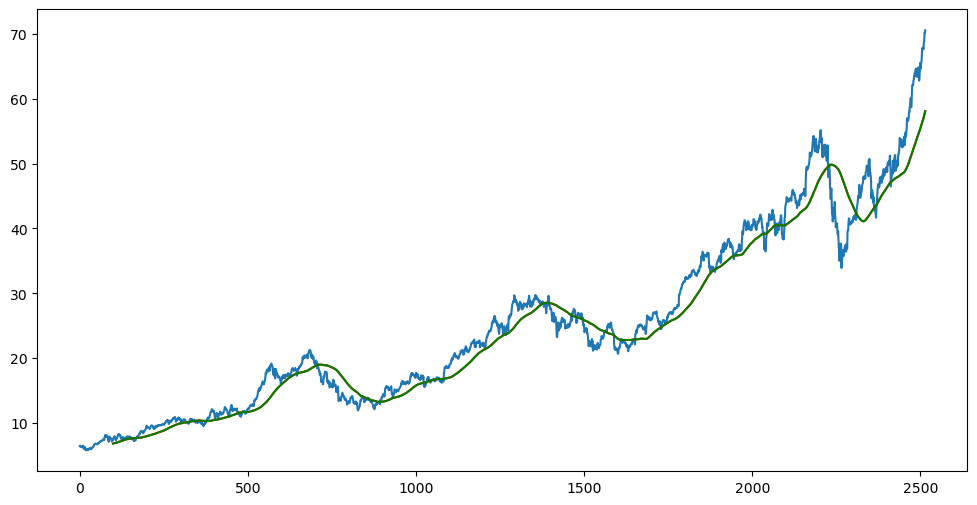

In [48]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [49]:
df.shape

(2515, 5)

In [50]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [51]:
data_training.head()

Ticker,AAPL
0,6.440331
1,6.451466
2,6.348845
3,6.337110
4,6.379241


In [52]:
data_testing.head()

Ticker,AAPL
1760,26.996571
1761,26.786106
1762,26.862423
1763,26.832357
1764,26.968815


In [53]:
from sklearn.preprocessing import MinMaxScaler  # Import the scaler

scaler = MinMaxScaler(feature_range=(0,1))  # Define the scaler

data_training_array = scaler.fit_transform(data_training)  # Transform the data
data_training_array  # Display the transformed array



array([[0.02760002],
       [0.02806507],
       [0.02377923],
       ...,
       [0.88408403],
       [0.89123173],
       [0.88640234]])

In [54]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) 

In [ ]:
# Ml Model

In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

units = 1
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Fixed typo

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Fixed typo

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Fixed typo

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))  # Fixed typo

model.add(Dense(units=1))


In [57]:
model.summary()




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)





Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.1435
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0136
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0111
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0123
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0109
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0088
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0088
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0071
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0066
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0084
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0072
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0062
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0069
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0070
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0065
E

In [59]:
model.save("keras_model.keras")  # Recommended Keras format


In [60]:
data_testing.head()

Ticker,AAPL
1760,26.996571
1761,26.786106
1762,26.862423
1763,26.832357
1764,26.968815


In [61]:
past_100_days = data_training.tail(100)

In [63]:
import pandas as pd
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)



In [64]:
final_df.head()

Ticker,AAPL
0,24.935091
1,25.036339
2,24.849960
3,24.833857
4,24.891382


In [65]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.02573549],
       [0.02789665],
       [0.02391836],
       [0.02357462],
       [0.02480252],
       [0.03118735],
       [0.03069619],
       [0.02991019],
       [0.02922271],
       [0.03059782],
       [0.02642313],
       [0.02809313],
       [0.0240657 ],
       [0.02180643],
       [0.01871225],
       [0.01812302],
       [0.01409558],
       [0.0145867 ],
       [0.01768096],
       [0.02259234],
       [0.02244496],
       [0.0256864 ],
       [0.01173811],
       [0.        ],
       [0.01134527],
       [0.02367274],
       [0.04243413],
       [0.06109749],
       [0.057905  ],
       [0.05132385],
       [0.05127475],
       [0.05117647],
       [0.05643168],
       [0.04705088],
       [0.04788586],
       [0.04891724],
       [0.05314107],
       [0.04444795],
       [0.04872088],
       [0.04611775],
       [0.04847522],
       [0.04872088],
       [0.05284627],
       [0.05368129],
       [0.06345488],
       [0.06468278],
       [0.06979045],
       [0.068

In [66]:
input_data.shape

(855, 1)

In [67]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [68]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [69]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [70]:
y_predicted.shape

(755, 1)

In [71]:
y_test

array([0.06973825, 0.06524584, 0.06687484, 0.06623308, 0.0691458 ,
       0.07556324, 0.08089478, 0.08148707, 0.08464659, 0.08217833,
       0.08114162, 0.08588083, 0.08583137, 0.0847947 , 0.08588083,
       0.08627575, 0.08573256, 0.09516152, 0.09545783, 0.09550709,
       0.09392743, 0.09254519, 0.12907585, 0.12798971, 0.13070497,
       0.13667819, 0.14279969, 0.14531724, 0.15002747, 0.14853995,
       0.15434091, 0.16291791, 0.16534749, 0.16455449, 0.16638888,
       0.17124743, 0.17328034, 0.17040471, 0.17104932, 0.17238795,
       0.17268524, 0.18656777, 0.18245261, 0.18651778, 0.18433663,
       0.1852293 , 0.1826512 , 0.18106422, 0.18334519, 0.18364264,
       0.18260129, 0.18988969, 0.19102973, 0.18755946, 0.19484762,
       0.18681563, 0.19464918, 0.19217059, 0.19078204, 0.19197191,
       0.20644905, 0.20803604, 0.20709394, 0.20575514, 0.20595333,
       0.21125846, 0.20754008, 0.20575514, 0.2041684 , 0.20332557,
       0.19569053, 0.19653337, 0.19281466, 0.19668222, 0.19355

In [72]:
y_predicted

array([[0.1232399 ],
       [0.12377967],
       [0.12431799],
       [0.12483527],
       [0.12531842],
       [0.12575665],
       [0.1261483 ],
       [0.12650463],
       [0.12684451],
       [0.12718461],
       [0.12754127],
       [0.12792028],
       [0.12832218],
       [0.12875067],
       [0.12920436],
       [0.12967776],
       [0.130165  ],
       [0.13065888],
       [0.13115562],
       [0.13166438],
       [0.13219129],
       [0.13273793],
       [0.13329907],
       [0.13389033],
       [0.13457198],
       [0.13539007],
       [0.13638356],
       [0.13758597],
       [0.13902172],
       [0.14070445],
       [0.14263472],
       [0.14480302],
       [0.14720482],
       [0.14983472],
       [0.15267484],
       [0.1556968 ],
       [0.15887026],
       [0.16216381],
       [0.16553769],
       [0.16894734],
       [0.17234957],
       [0.17569081],
       [0.17894162],
       [0.1820941 ],
       [0.18514231],
       [0.1880769 ],
       [0.19088644],
       [0.193

In [73]:
scaler.scale_

array([0.02134523])

In [74]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

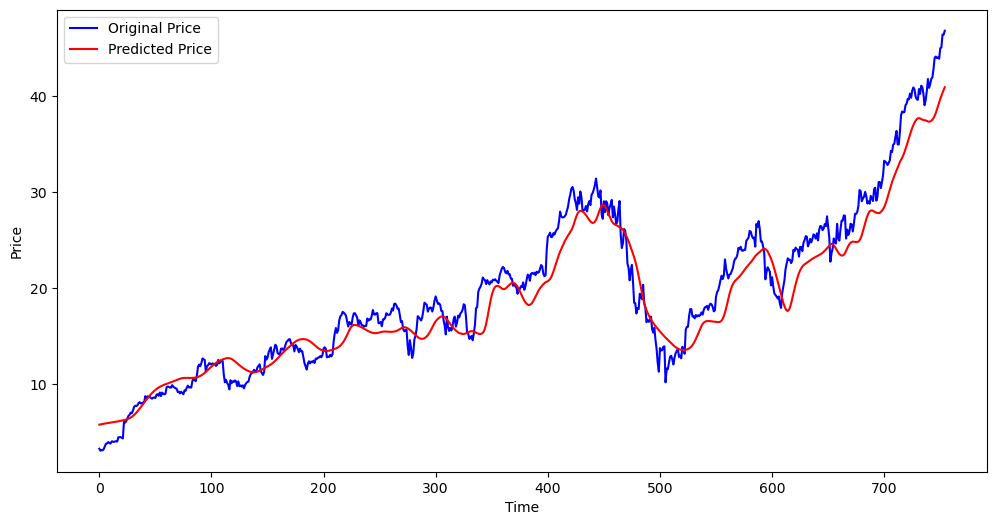

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()